<a href="https://colab.research.google.com/github/Shubhangiwaghmare7/Data-Science/blob/main/churn_modlling_class_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all the libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#importing all the tensorlow lib
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
X = data.iloc[: , 3:13]
y = data.iloc[:,13]

In [ ]:
geography = pd.get_dummies(X['Geography'])
gender = pd.get_dummies(X['Gender'])


In [ ]:
X = pd.concat([X , geography , gender] , axis = 1)

In [ ]:
X.drop(columns = ['Geography' , 'Gender'] , axis = 1 , inplace=True)

In [ ]:
X_train , X_test , y_train , y_test= train_test_split(X,y , random_state = 101 , test_size = 0.2 )

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# create a model
model = Sequential([
                  Dense(128 , activation='relu' , kernel_initializer= 'he_normal',),
                  Dropout(0.5),

                  Dense(64, activation='sigmoid' ),
                  Dropout(0.5),

                  Dense(32, activation='relu' , kernel_initializer= 'he_normal'),
                  Dropout(0.3),

                  Dense(16, activation='sigmoid' ),
                  Dropout(0.2),

                  Dense(8, activation='relu' , kernel_initializer= 'he_normal'),
                  Dropout(0.1),

                  Dense(1 , activation='sigmoid')
])

In [ ]:
model.compile(optimizer='SGD' , loss = 'binary_crossentropy' , metrics=['accuracy'])

In [ ]:
history = model.fit(X_train , y_train, batch_size=32 , epochs=50 , validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.6771 - accuracy: 0.5633 - val_loss: 0.5266 - val_accuracy: 0.8037
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.8058 - val_loss: 0.5054 - val_accuracy: 0.8037
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.7974 - val_loss: 0.4996 - val_accuracy: 0.8037
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.8022 - val_loss: 0.5016 - val_accuracy: 0.8037
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.7958 - val_loss: 0.5000 - val_accuracy: 0.8037
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7911 - val_loss: 0.4974 - val_accuracy: 0.8037
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7973 - val_loss: 0.4974 - val_accuracy: 0.8037
Epoch 

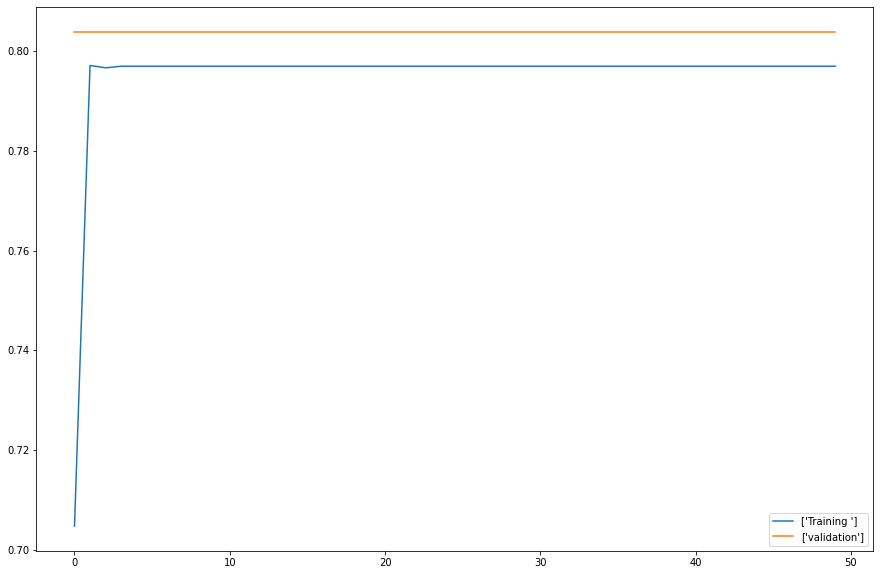

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'] , label=['Training '])
plt.plot(history.history['val_accuracy'] , label=['validation'])
plt.legend()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[0.20759818],
       [0.19379869],
       [0.21364966],
       ...,
       [0.21116695],
       [0.19986126],
       [0.22744304]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred , y_test)

0.7885